# Problem statement


Customer Personality Analysis is a detailed analysis of a company's ideal customer. This is something that helps businesses to better understand its customers and makinglit easier for them to modify products/prices/advertising according to the specific needs, behaviors and concerns of different types of customers.

For example, instead of spending money to market a new product to every customer in the company's database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# Date

Attribute |Description
| --------- | ----------- |
ID    |Customer's unique identifier
Year_Birth|Customer's birth year
Education|Customer's education level
Marital_Status|Customer's marital status
Income|Customer's yearly household income
Kidhome|Number of children in customer's household
Teenhome|Number of teenagers in customer's household
Dt_Customer|Date of customer's enrollment with the company
Recency|Number of days since customer's last purchase
Complain|1 if the customer complained in the last 2 years, 0 otherwise
Products
MntWines|Amount spent on wine in last 2 years
MntFruits|Amount spent on fruits in last 2 years
MntMeatProducts|Amount spent on meat in last 2 years
MntFishProducts|Amount spent on fish in last 2 years
MntSweetProducts|Amount spent on sweets in last 2 years
MntGoldProds|Amount spent on gold in last 2 years
Promotion
NumDealsPurchases|Number of purchases made with a discount
AcceptedCmp1|1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2|1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3|1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4|1 if customer accepted the offer in the 4th campaign, O otherwise
AcceptedCmp5|1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response|1 if customer accepted the offer in the last campaign, 0 otherwise
Place
NumWebPurchases|Number of purchases made through the company's website
NumCatalogPurchases|Number of purchases made using a catalogue
NumStorePurchases|Number of purchases made directly in stores
NumWebVisitsMonth|Number of visits to company's website in the last month







# Goal

Use Unsupervised Machine Learning models, to try to categorize customers, and to try to analyse how to market to each customer type.

In [938]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from scipy.stats import zscore
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score


import warnings
import sys
if not sys.warnoptions:
    warnings. simplefilter("ignore")

# EDA

In [939]:
df = pd.read_csv("./marketing_campaign.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Understanding the dataset

In [940]:
df.shape

(2240, 29)

Let's have a look on data information and description

In [941]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [942]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Check for missing values and duplicated

In [943]:
print("Checking for duplicates in each column: \n")
df[df.duplicated(subset=[c for c in list(df.columns) if c != 'ID'], keep=False)].sort_values (by='Year_Birth')

Checking for duplicates in each column: 



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
894,8800,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,...,6,1,0,0,0,0,0,3,11,1
39,2968,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,...,6,1,0,0,0,0,0,3,11,1
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,...,3,0,0,1,1,0,0,3,11,1
1771,7592,1946,PhD,Married,51012.0,0,0,18-04-2013,86,102,...,6,0,0,0,0,0,0,3,11,0
1747,7881,1946,Master,Married,66835.0,0,0,28-09-2013,21,620,...,2,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,3386,1992,Graduation,Married,34935.0,0,0,21-06-2013,71,34,...,7,0,0,0,0,0,0,3,11,0
928,10037,1993,Graduation,Single,74293.0,0,0,04-05-2014,66,375,...,2,0,0,0,0,0,0,3,11,0
392,2669,1993,Graduation,Single,74293.0,0,0,04-05-2014,66,375,...,2,0,0,0,0,0,0,3,11,0
995,5184,1995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,...,6,0,0,0,0,0,0,3,11,0


In [944]:
print(df[df.duplicated(subset=[c for c in list(df.columns) if c != 'ID'], keep=False)].sort_values(by='Year_Birth').shape[0])

358


In [945]:
print("Checking for missing values in each column: \n")
df.isnull().sum()

Checking for missing values in each column: 



ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There is missing data in Income.

### Plot distribution of numerical features

In [946]:
def plot_distributions(df, title):

    df.hist(bins=20, figsize=(26, 18), color='#88CC88')
    plt. suptitle(title, fontsize=16)
    plt.show()

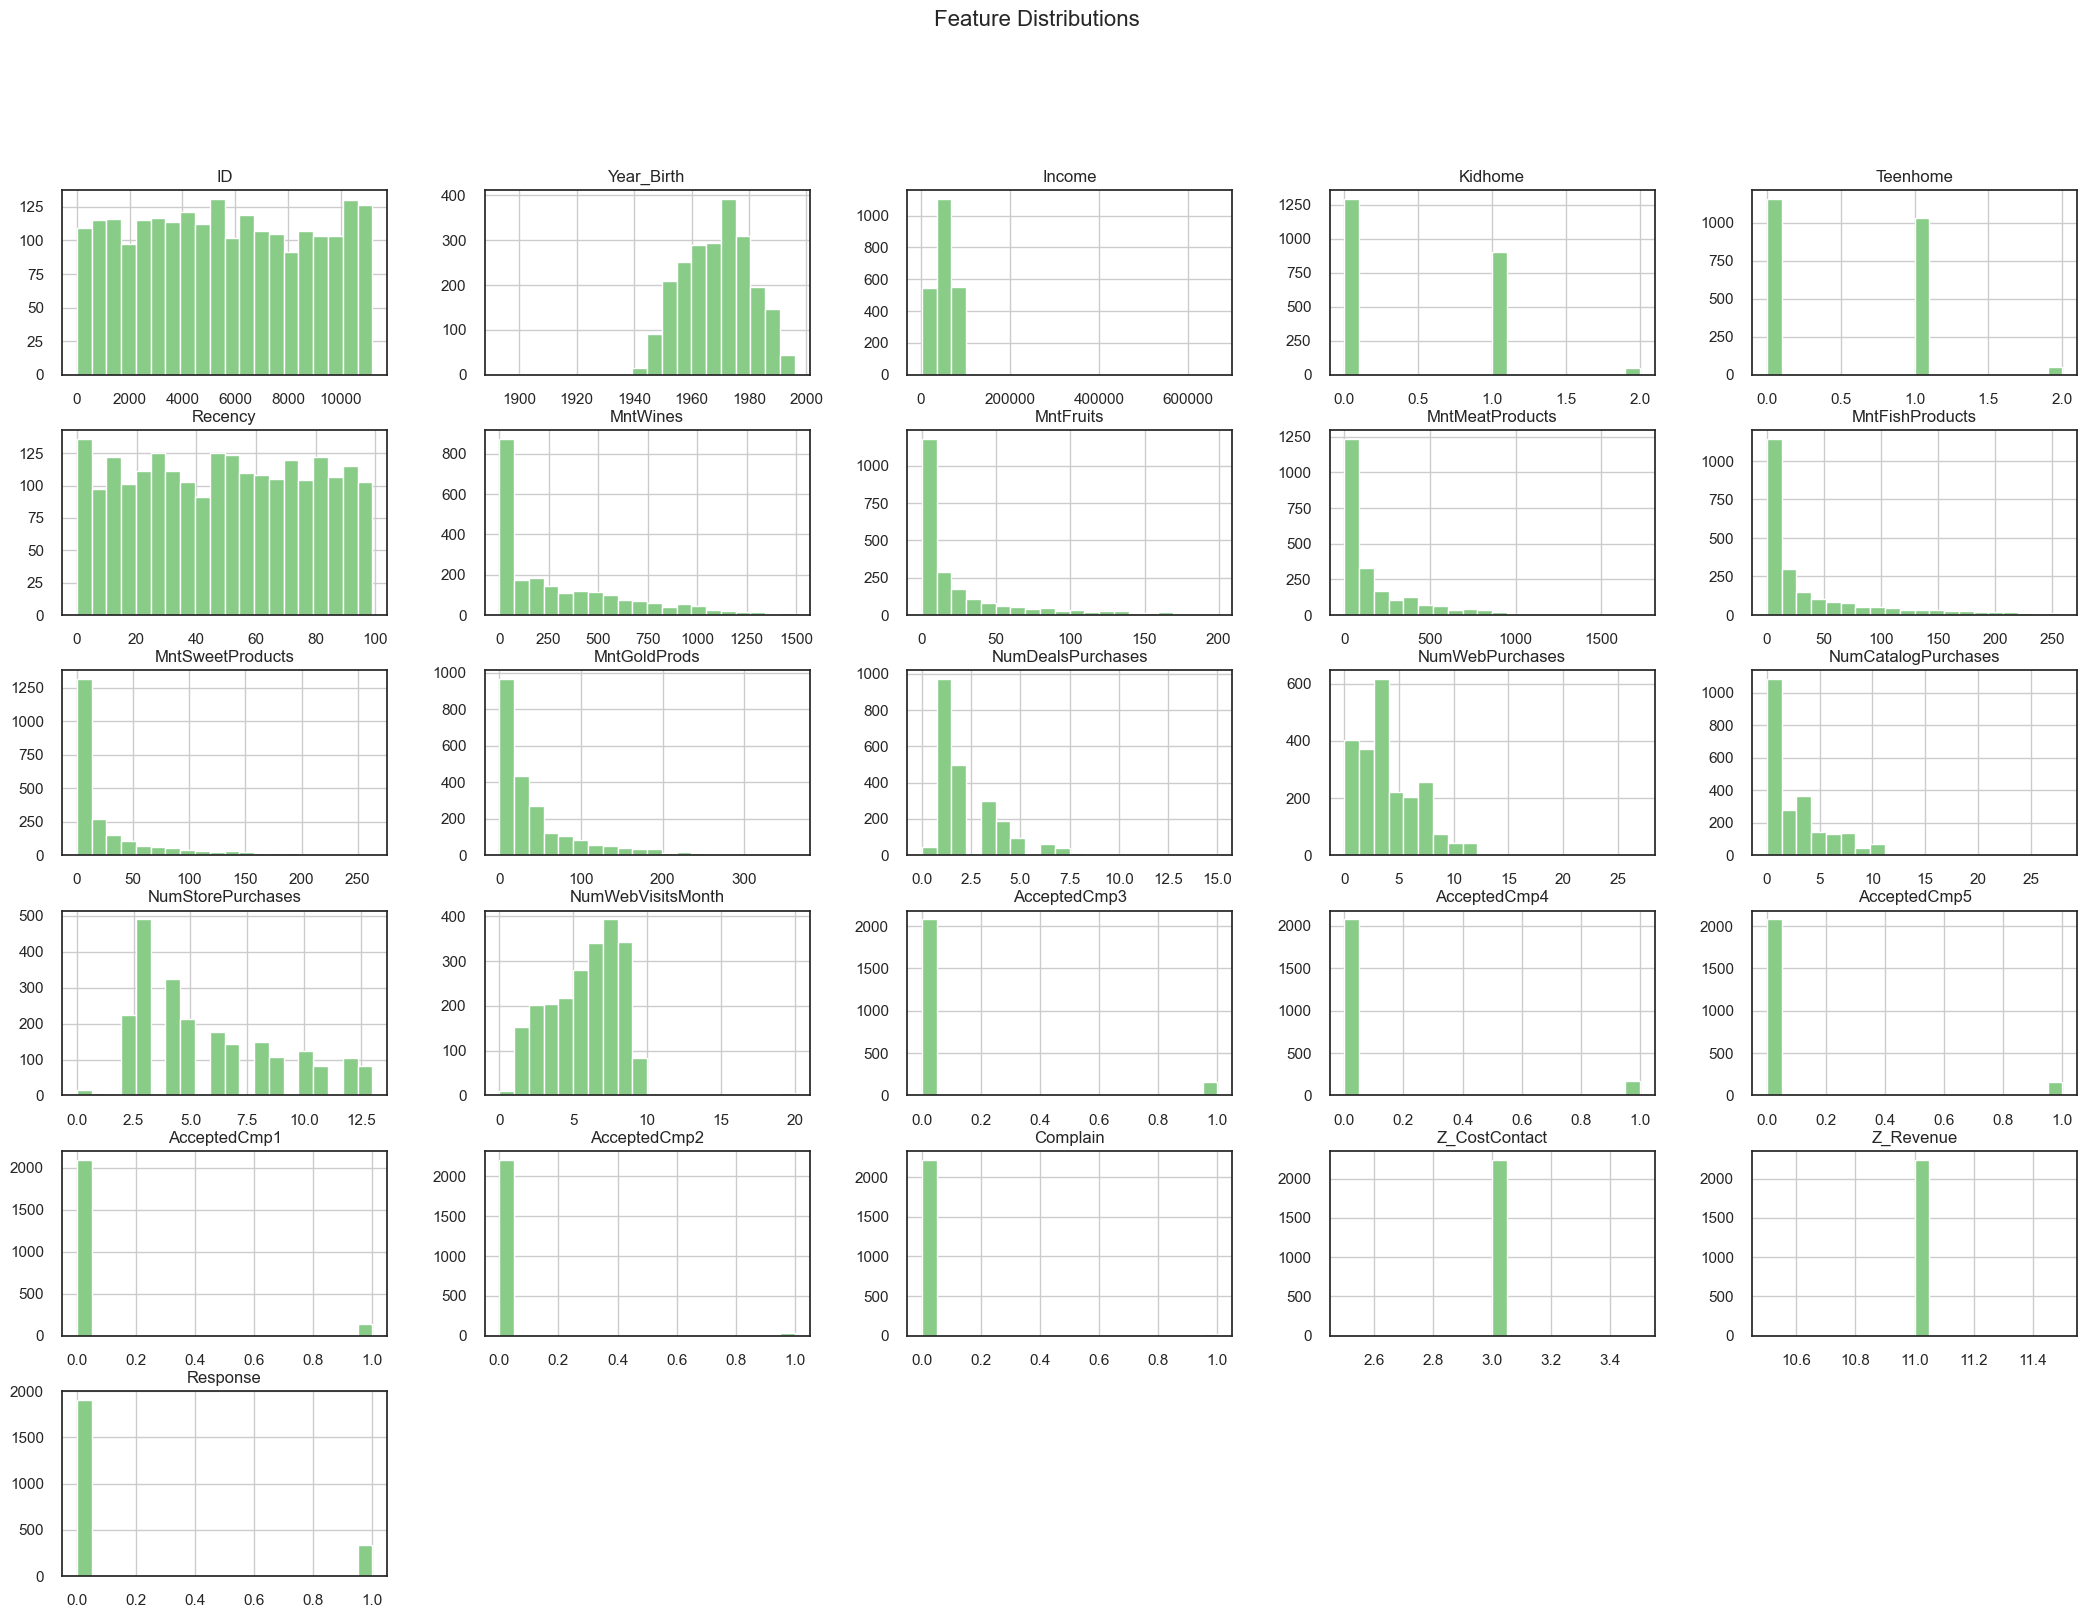

In [947]:
numeric_columns = list(df.select_dtypes(include=['number']))
plot_distributions(df[numeric_columns],"Feature Distributions")

From this distributions we can see, that Year_Birth and Income has strong outliers that can be removed

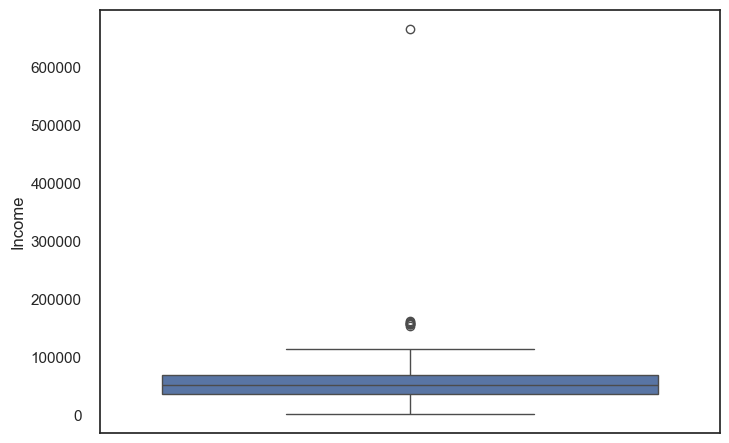

In [948]:
sns. boxplot(data=df['Income'])
plt. show()

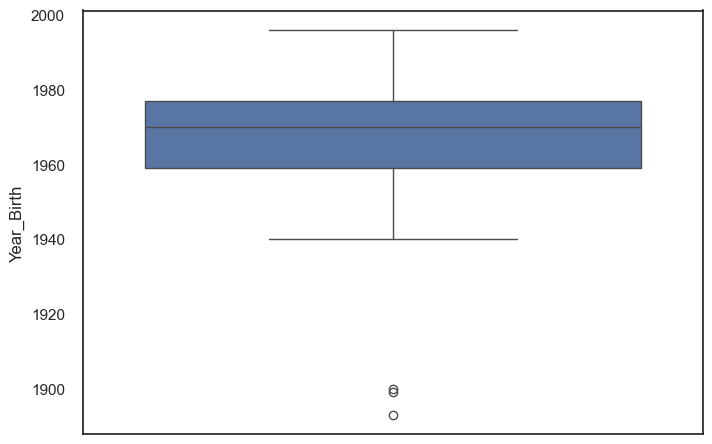

In [949]:
sns.boxplot(data=df['Year_Birth'])
plt.show()

### Correlation between numerical features

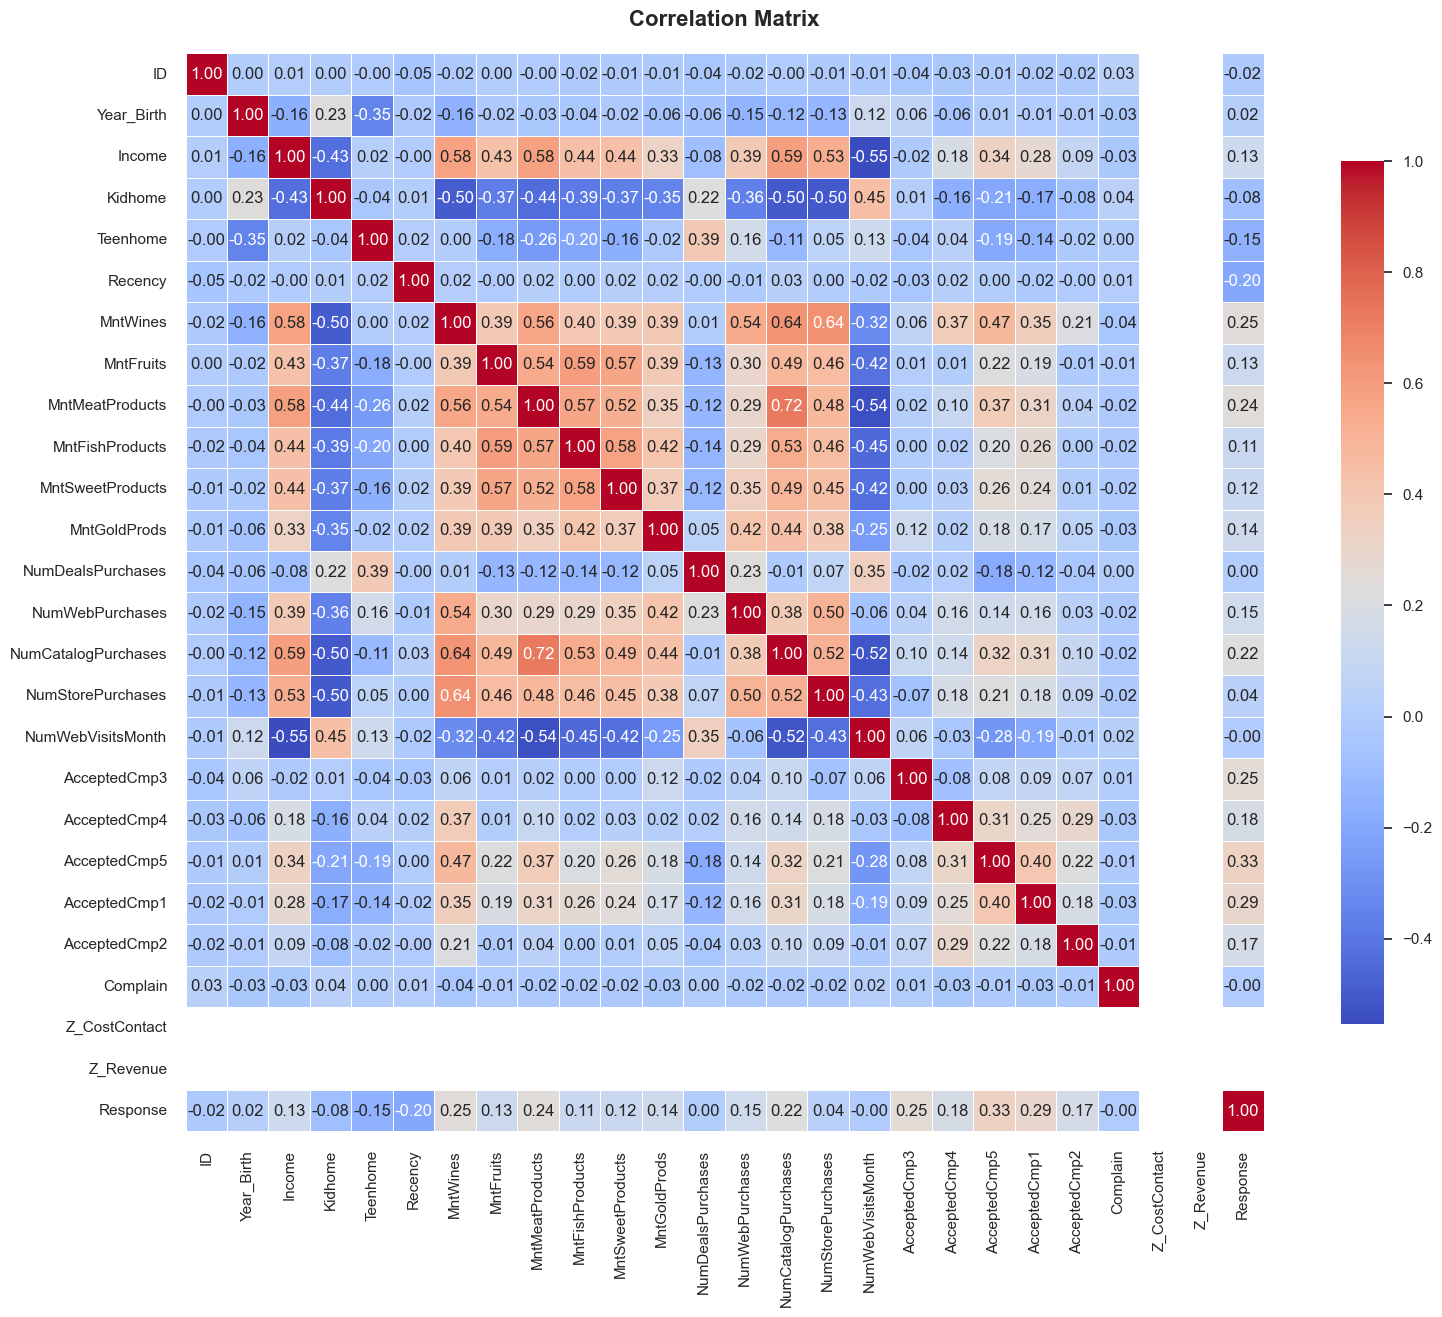

In [950]:
def plot_correlation_matrix(df, title="Correlation Matrix"):
    corr = df[numeric_columns].corr()

    sns.set(style="white")
    plt.figure(figsize=(20, 14))
    sns.heatmap(corr, annot=True, cmap="coolwarm",
                fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
    plt. title(title, fontsize=16, weight='bold', pad=20)
    plt. show()

plot_correlation_matrix(df)

### Analyze categorial features

In [951]:
categorical_columns = ['Education', 'Marital_Status']
for col in categorical_columns:
    print(df[col].value_counts())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


Plot frequency of categories:

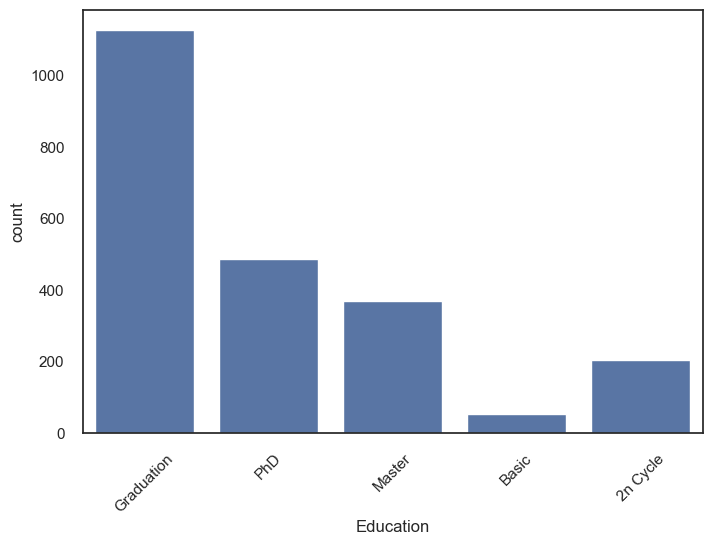

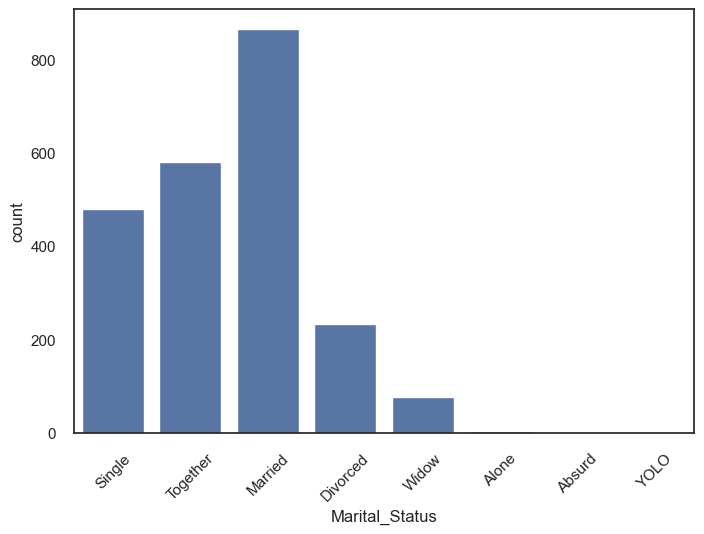

In [952]:
for col in categorical_columns:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt. show()

Education feature has valid values.

Marital_Status: Alone can be renamed to Single. Rows with Absurd or YOLO values can be removed.

### Summary
- Data has 2240 rows and 29 columns
- Income has missing values
- Dt_ Customer has object type insead of DateTime and can be splited into Year, Month features
- Education, Marital_Status have type object
- Some features have outliers
- Marital_Status has invalid values
- Data has some amount of duplicates

## Data Preprocessing

We'll now use data preprocessing transformers for data cleaning, transforming, and imputing. These preprocessing steps ensure data consistency, handle missing values intelligently, and prepare features for effective use in machine learning models

We are going to be doing this in the following few sections

## Fixing issues in data

We are going to be removing outliers, fixing the values for Marital Status, dropping duplicates, dropping NA values from the income col

In [953]:



class RemoveOutliers(BaseEstimator, TransformerMixin):
    """
    Remove critical outliers from Income and Year of Birth.
    """
    def fit(self, X, y=None):
        return self

    def transform (self, X):
        X = X.copy()
        X = X[(X['Year_Birth'] > 1948) & (X['Income'] < 200000)]
        return X
    

class FixMaritalStatus(BaseEstimator, TransformerMixin):
    """
    Fix Marital Status values
    """
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X['Marital_Status'] = X['Marital_Status'].replace('Alone', 'Single')
        X = X[~X['Marital_Status'].isin(['YOLO', 'Absurd'])]
        return X
    

class DropDuplicates(BaseEstimator, TransformerMixin):
    """
    Drop duplicated rows
    """
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        
        subset = [c for c in list(X.columns) if c != 'ID']
        X = X.drop_duplicates(subset=subset)
        return X
    

class FixIncome(BaseEstimator, TransformerMixin):
    """
    Imputes missing values based on condition
    """
    def fit(self, X, y=None) :
        return self
    
    def transform(self, X):
        X = X.copy()
        X.loc[(X['Income'].isna()), 'Income'] = X['Income'].mode()[0]
        return X




## Creating new features:

Now we are create new columns/features by combining/merging existing features

In [954]:
class CampaignResponse(BaseEstimator, TransformerMixin):
    """
    Transformer to sum up campaign responses (AcceptedCmp1 to AcceptedCmp5, Response)
    into a single feature 'TotalAcceptedOffers'.
    """
    def __init__(self):
        self.cols_to_sum = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                            'AcceptedCmp4', 'AcceptedCmp5', 'Response']
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X. copy()

        X['Total_Accepted_Offers'] = X[self.cols_to_sum].sum(axis=1)
        X['Accepted_Offers'] = X['Total_Accepted_Offers'] != 0
        cols_to_drop = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                        'AcceptedCmp4', 'AcceptedCmp5', 'Response',
                        'Total_Accepted_Offers']
        
        return X.drop(columns=cols_to_drop)
    

class GroupAge(BaseEstimator, TransformerMixin):
    """
    Converts Year_Birth into age bins.
    """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        current_year = pd.Timestamp.now().year
        X['Age'] = current_year - X['Year_Birth']

        X['Age_Group'] = pd. cut(
            X['Age'],
            bins=[18, 48, 60, 100],
            labels=['18-40', '40-60', '60+']
        )
        X.drop(columns=['Year_Birth', 'Age'], inplace=True)
        return X
    

class GroupIncome(BaseEstimator, TransformerMixin):
    """
    Group income into categories
    """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        bins = [0, 30000, 60000, 200000]
        labels = ['low (0-30k)', 'Middle (30k-60k)', 'High (60k-200k)']

        X['Income_Group'] = pd.cut(X['Income'], bins=bins, labels=labels)

        X = X.drop(columns=['Income'])
        return X


class HasKids(BaseEstimator, TransformerMixin):
    """
    Split data to no kids (0), have kids.
    """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        X['Has_Kids'] = 0
        condition = (
            (X['Kidhome'] != 0) |
            (X['Teenhome'] != 0)
        )
        X.loc[condition, 'Has_Kids'] = 1

        X.drop(columns=['Kidhome', 'Teenhome'],inplace=True)
        return X


class CreateTotalSpending(BaseEstimator,TransformerMixin):
    """
    Create a Total_Spending feature by summing up spending columns.
    """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
        X['Total_Spending'] = X[spending_columns].sum(axis=1)
        return X

class CustomerTenure(BaseEstimator, TransformerMixin):
    """
    Converts Dt_Customer into a tenure category (New, Mid, Loyal).
    """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        X['Dt_Customer'] = pd.to_datetime(X['Dt_Customer'], format='%d-%m-%Y')
        X['Tenure_Days'] = (pd.Timestamp.now() - X['Dt_Customer']).dt.days

        X['Customer_Tenure'] = pd.cut(
            X['Tenure_Days'],
            bins=[0,
                X['Tenure_Days'].quantile(0.33),
                X['Tenure_Days'].quantile(0.66),
                X['Tenure_Days'].max()
                ],
            labels=['New', 'Mid', 'Loyal']
        )

        X. drop(columns=['Dt_Customer', 'Tenure_Days'], inplace=True)
        return X


class GroupMaritalStatus(BaseEstimator, TransformerMixin):
    """
    Split people into single (0), has partner (1)
    """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        X['Marital_Status'] = X['Marital_Status'].map(
            {'Single': 0,
            'Together': 1,
            'Married': 1,
            'Divorced': 0,
            'Widow': 0
            }
        )
        return X


class GroupEducation(BaseEstimator, TransformerMixin):
    """
    Split customers by education level
    """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        X['Education'] = X['Education'].map(
            {'PhD': 'Graduation',
            'Master': 'Graduation',
            'Basic': 'NoGraduation',
            '2n Cycle': 'NoGraduation',
            'Graduation': 'Graduation'
            }
        )
        return X

## Drop identifiers, encoding and normalization


In [955]:
class DropColumns(BaseEstimator, TransformerMixin):
    """
    Drops column that is identifier.
    Rationale: 'ID' is identifier.
    """
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        X.drop(['ID'], axis=1, inplace=True)
        return X
    

class EncodeCategoricalValues(BaseEstimator, TransformerMixin):
    """
    Convert categorical variables into numerical format
    and allow decoding back to original categories.
    """
    def __init__(self):
        self.encoders = {}

    def fit(self, X, y=None):
        for col in ['Education', 'Marital_Status', 'Income_Group',
                    'Age_Group', 'Customer_Tenure']:
            le = LabelEncoder()
            le.fit(X[col])
            self.encoders[col] = le
        return self
    
    def transform(self, X):
        X = X.copy()

        for col, le in self.encoders.items():
            X[col] = le.transform(X[col])
        return X

    def inverse_transform(self, X):
        X = X.copy()

        for col, le in self.encoders.items():
            X[col] = le.inverse_transform(X[col].astype(int))
        return X



class Normalization(BaseEstimator, TransformerMixin):
    """
    Scales all numerical features to a range between 0 and 1 using Min-Max scaling.
    """
    def __init__(self):
        self.scaler = MinMaxScaler()
                                    
    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self
    
    def transform(self, X):
        X = X.copy()
        X_scaled = pd.DataFrame(self.scaler.transform(X), columns=X.columns, index=X. index)
        return X_scaled
    
    def inverse_transform(self, X):
        X_original = pd.DataFrame(self.scaler.inverse_transform(X), columns=X.columns, index=X.index)
        return X_original


In [956]:
preprocessing_pipeline = Pipeline([
    ('fix_income', FixIncome()),
    ('fix_marital_status', FixMaritalStatus()),
    ('drop_duplicates', DropDuplicates()),
    ('customer_tenure', CustomerTenure()),
    ('create_total_spending', CreateTotalSpending()),
    ('drop_columns', DropColumns()),
    ('remove_outliers', RemoveOutliers()),
    ('group_income', GroupIncome()),
    ('group_age', GroupAge()),
    ('has_kids', HasKids()),
    ('has_partner', GroupMaritalStatus()),
    ('education', GroupEducation()),
    ('accepted_offers', CampaignResponse()),
    ('encode_categorical_values', EncodeCategoricalValues()),
    ('normalization', Normalization())
])

In [957]:
df_transformed = preprocessing_pipeline.fit_transform(df)

### Plot distributions again

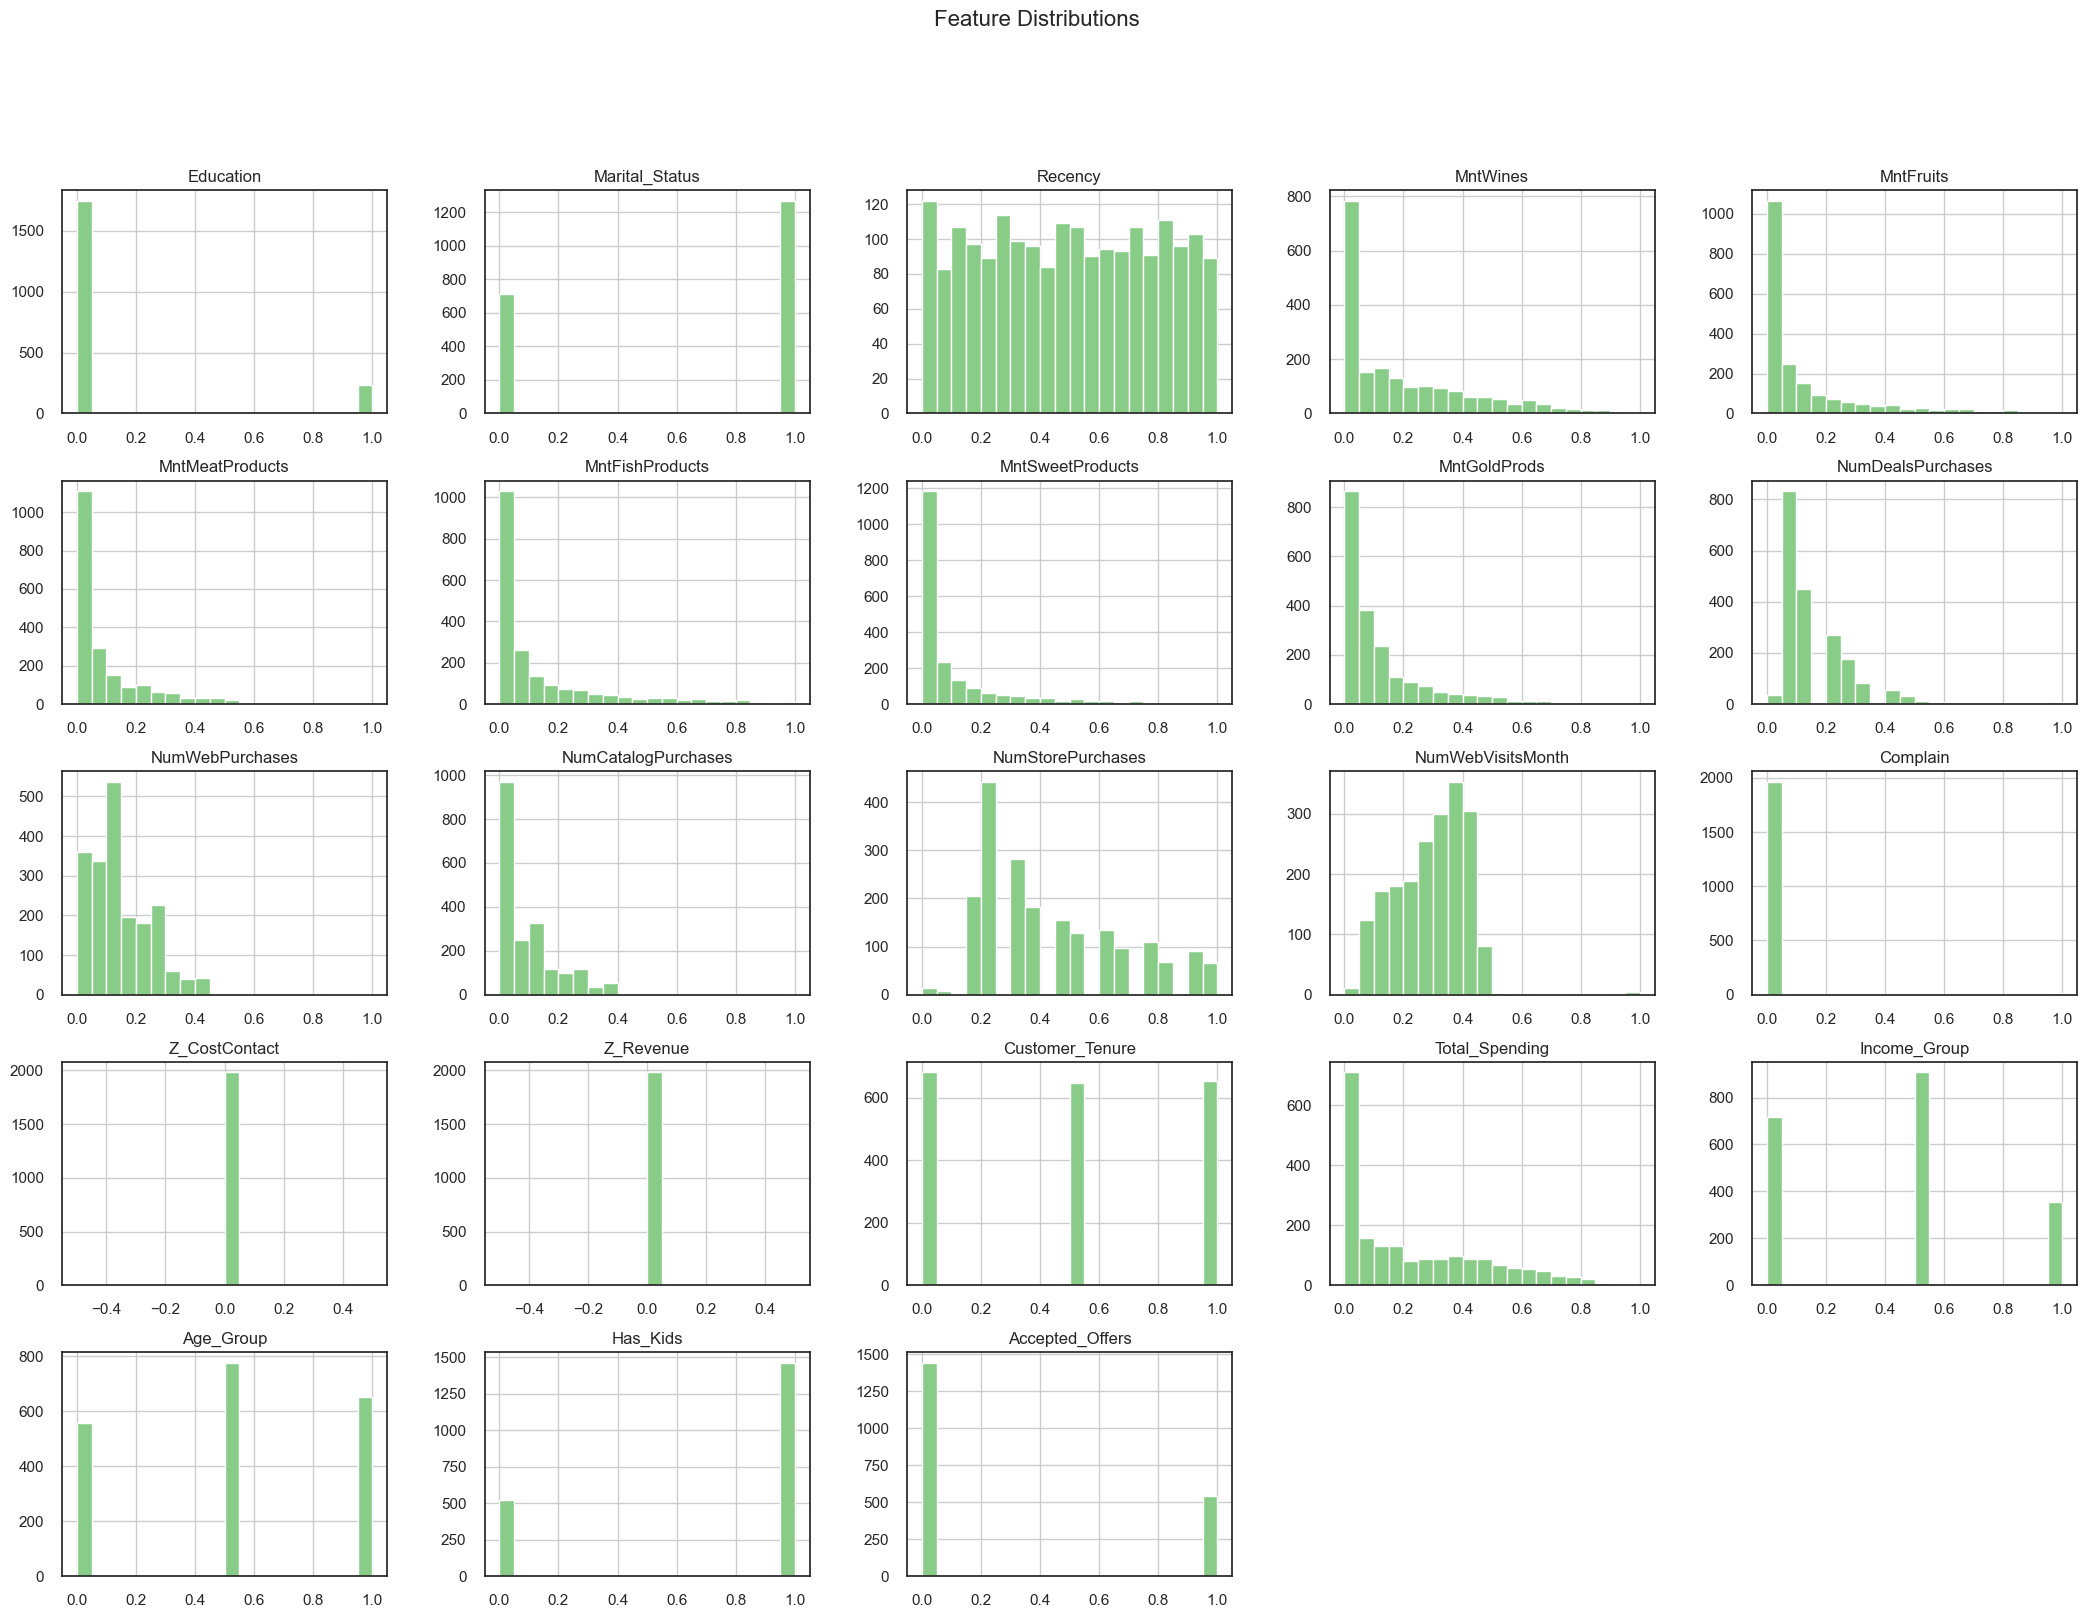

In [958]:
plot_distributions(df_transformed, "Feature Distributions")

Result shape:

In [959]:
df_transformed.shape

(1981, 23)

In [960]:
df_transformed.head()

,Education,Marital_Status,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Customer_Tenure,Total_Spending,Income_Group,Age_Group,Has_Kids,Accepted_Offers
0,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.200000,...,0.35,0.0,0.0,0.0,0.0,0.639683,0.5,1.0,0.0,1.0
1,0.0,0.0,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.133333,...,0.25,0.0,0.0,0.0,1.0,0.008730,0.5,1.0,1.0,0.0
2,0.0,1.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.066667,...,0.20,0.0,0.0,0.0,0.5,0.305952,0.0,0.5,0.0,0.0
3,0.0,1.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.133333,...,0.30,0.0,0.0,0.0,1.0,0.019048,1.0,0.0,1.0,0.0
4,0.0,1.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.333333,...,0.25,0.0,0.0,0.0,1.0,0.165476,0.5,0.0,1.0,0.0


## Dimensionality Reduction

Dataset has many features, We'll use PCA to reduce dimensionality.

In [961]:
pca = PCA(n_components=3)
df_pca = pd.DataFrame(pca.fit_transform(df_transformed))

In [962]:
df_pca.head()

,0,1,2
0,-1.183315,-0.640487,-0.417378
1,0.514835,-0.673316,0.629869
2,-0.624880,0.457051,0.324745
3,0.841071,0.288837,0.125943
4,0.415293,0.389104,0.321037


In [963]:
df_pca.describe()

,0,1,2
count,1.981000e+03,1.981000e+03,1.981000e+03
mean,-3.138440e-18,7.263246e-17,-1.022235e-16
std,6.467213e-01,4.810179e-01,4.243959e-01
min,-1.788538e+00,-8.224692e-01,-1.287523e+00
25%,-4.411932e-01,-5.863442e-01,-3.035374e-01
50%,1.690859e-01,2.831169e-01,3.494907e-02
75%,5.273840e-01,3.685687e-01,3.176416e-01
max,9.591835e-01,5.452326e-01,1.012187e+00


## Training the Models

For this dataset, we are going to be trying K-Means Clustering and Agglomerative Clustering. We are going to see which methods yields the best results. We are going to use Silhouette Score to compare the performance of the 2 methods.

### Determine the Number of Clusters

Use the Elbow Method to determine the optimal number of clusters for K-Means Clustering

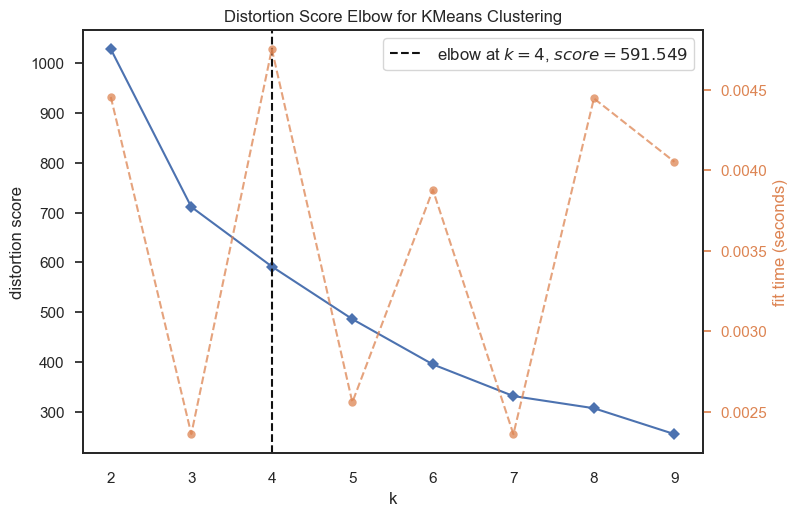

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [964]:
elbow_m = KElbowVisualizer(KMeans(), k=(2, 10))
elbow_m.fit(df_pca)
elbow_m.show()

In [965]:
best_k = elbow_m.elbow_value_
print("Best K:", best_k)

Best K: 4


We are now going to use Dendrogram to get the optimal number of clusters for Agglomerative Clustering.

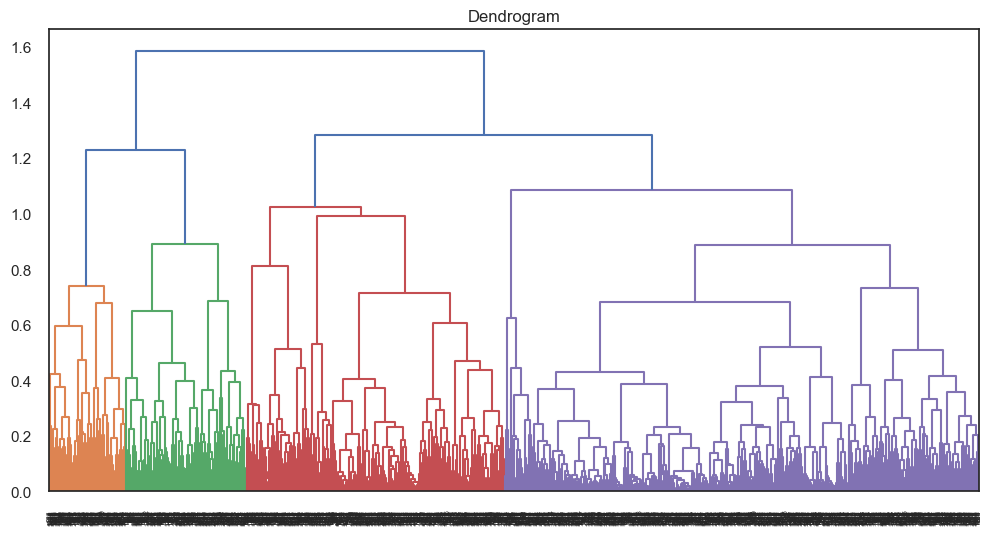

In [966]:
linked = linkage(df_pca, method='average')

plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title('Dendrogram')
plt.show()

In [967]:
last = linked [-10:, 2]
max_gap = np.diff(last)
t = last[np.argmax(max_gap)]
print("🔥Automatic Threshold:", t)

num_clusters = fcluster(linked, t, criterion='distance')
best_num_agglo_cluster = len(np.unique(num_clusters))
print("✅ Number of Clusters:", len(np.unique(num_clusters)))

🔥Automatic Threshold: 1.2812088859888884
✅ Number of Clusters: 2


Optimal number of Clusters for K-Means Clustering is 5

Optimal number of Clusters for Agglomerative Clustering is 2

## Apply Clustering Algorithm

We are going to run various hyperparameters for both Clustering options.

### Agglomerative Clustering

For Agglomerative Clustering, we are going to be playing around with different options for linkage methods and disance metrics.

In [968]:
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan', 'cosine']

best_silhouette_score_agglo = -1
best_agglo_params = {}

for linkage in linkage_methods:
    for metric in metrics:
        if linkage == 'ward' and metric != 'euclidean':
            continue
        agglomerative_cluster = AgglomerativeClustering(
            n_clusters=best_num_agglo_cluster,
            linkage=linkage,
            metric=metric if linkage != 'ward' else 'euclidean'
        )
        cluster_labels = agglomerative_cluster.fit_predict(df_pca)
        silhouette_avg = silhouette_score(df_pca, cluster_labels)
        print(f"Linkage: {linkage}, Metric: {metric} - Silhouette Score: {silhouette_avg}")

        if silhouette_avg > best_silhouette_score_agglo:
            best_silhouette_score_agglo = silhouette_avg
            best_agglo_params = {
                'linkage': linkage,
                'metric': metric,
                'silhouette_score': silhouette_avg
            }
print(f"\nBest Agglomerative Clustering Parameters: {best_agglo_params}")

Linkage: ward, Metric: euclidean - Silhouette Score: 0.3527849250704932
Linkage: complete, Metric: euclidean - Silhouette Score: 0.33026483942359025
Linkage: complete, Metric: manhattan - Silhouette Score: 0.35302618778317796
Linkage: complete, Metric: cosine - Silhouette Score: 0.3387336943896836
Linkage: average, Metric: euclidean - Silhouette Score: 0.3617427083646532
Linkage: average, Metric: manhattan - Silhouette Score: 0.3387336943896836
Linkage: average, Metric: cosine - Silhouette Score: 0.3387336943896836
Linkage: single, Metric: euclidean - Silhouette Score: 0.3387336943896836
Linkage: single, Metric: manhattan - Silhouette Score: 0.3387336943896836
Linkage: single, Metric: cosine - Silhouette Score: 0.3387336943896836

Best Agglomerative Clustering Parameters: {'linkage': 'average', 'metric': 'euclidean', 'silhouette_score': 0.3617427083646532}


Now that we have the best Parameters for Agglomerative Clustering, we are going to build the final model and store the results in the df

In [969]:
agglomerative_cluster = AgglomerativeClustering(n_clusters=best_num_agglo_cluster, linkage=best_agglo_params['linkage'], metric=best_agglo_params['metric'])
df_transformed['Hierarchical_Cluster'] = agglomerative_cluster.fit_predict(df_pca)

In [970]:
silhouette_hierarchical = silhouette_score(df_pca, df_transformed['Hierarchical_Cluster'])
print(f"🔥Hierarchical Clustering Silhouette Score: {silhouette_hierarchical:.4f}")

🔥Hierarchical Clustering Silhouette Score: 0.3617


### K-Means Clustering
Now, we are going to play around with K-Means Clustering

K-Means Clustering is more restricted compared to Agglomerative Clustering in terms of what we can try and test. So we are only going to test different values for init_ methods

In [971]:
init_methods = ['k-means++', 'random']

best_silhouette_score_kmeans = -1
best_kmeans_params = {}

for init_method in init_methods:
    kmeans = KMeans(
        n_clusters=best_k,
        init=init_method,
        random_state=42
    )

    kmeans_labels = kmeans.fit_predict(df_pca)

    silhouette_avg = silhouette_score(df_pca, kmeans_labels)

    print(f"KMeans (init: {init_method}) - Silhouette Score: {silhouette_avg}")

    if silhouette_avg > best_silhouette_score_kmeans:

        best_silhouette_score_kmeans = silhouette_avg
        best_kmeans_params = {
            'init': init_method,
            'silhouette_score': silhouette_avg
        }

print(f"\nBest KMeans Parameters: {best_kmeans_params}")

KMeans (init: k-means++) - Silhouette Score: 0.3378094671187186
KMeans (init: random) - Silhouette Score: 0.4061361777662744

Best KMeans Parameters: {'init': 'random', 'silhouette_score': 0.4061361777662744}


In [972]:
kmeans = KMeans(n_clusters=best_k, init=best_kmeans_params['init'], random_state=42)
df_transformed['KMeans_Cluster'] = kmeans.fit_predict(df_pca)

In [973]:
silhouette_kmeans = silhouette_score(df_pca, df_transformed ['KMeans_Cluster'])
print(f"🔥 K-Means Silhouette Score: {silhouette_kmeans:.4f}")

🔥 K-Means Silhouette Score: 0.4061


In [974]:
df_pca.head()

,0,1,2
0,-1.183315,-0.640487,-0.417378
1,0.514835,-0.673316,0.629869
2,-0.624880,0.457051,0.324745
3,0.841071,0.288837,0.125943
4,0.415293,0.389104,0.321037


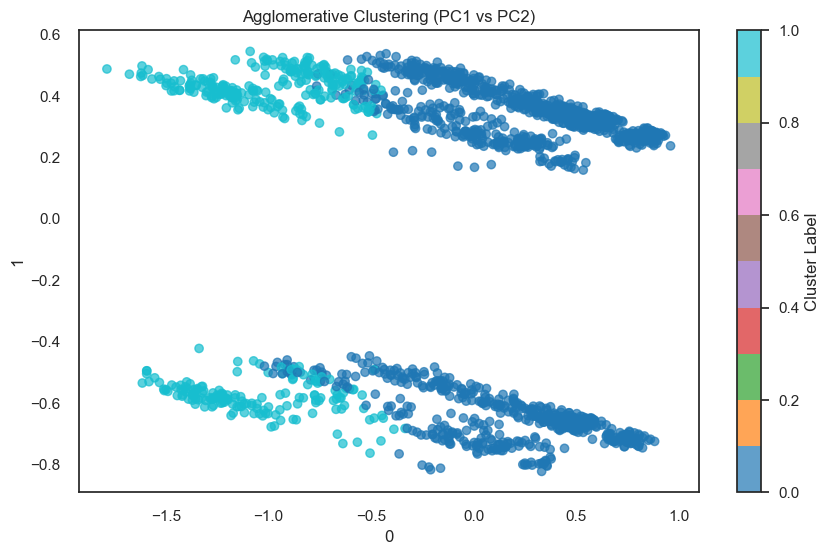

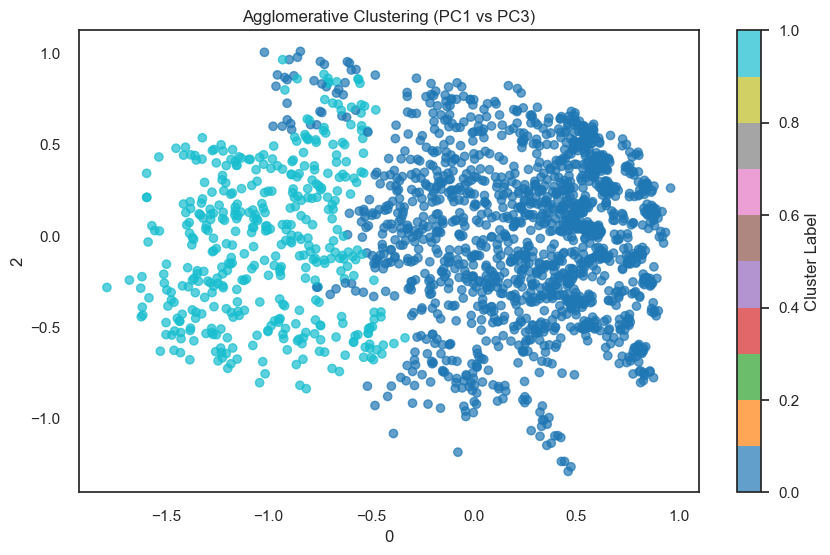

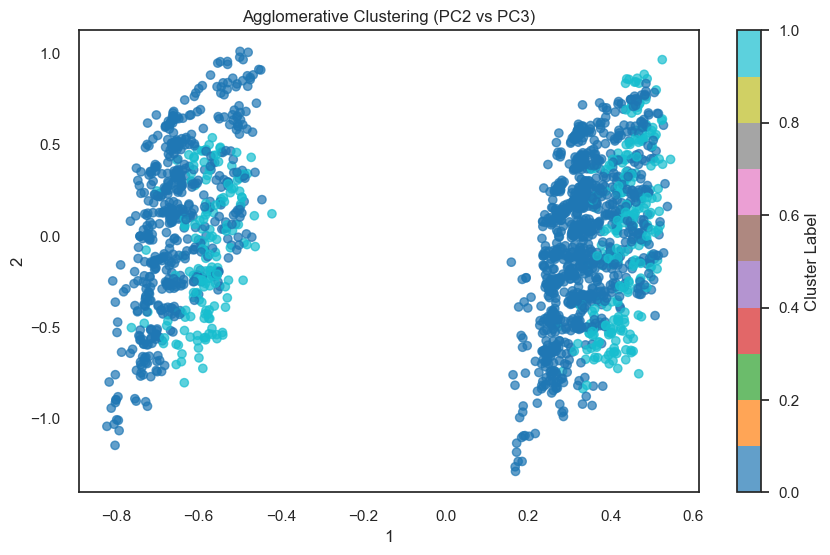

In [975]:
def plot_pca_2d(df, labels, title, x=0, y=1):
    """
    Visualize PCA components in 2D by choosing two components.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x], df[y], c=labels, cmap='tab10', alpha=0.7)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.colorbar(label="Cluster Label")
    plt.show()

plot_pca_2d(df_pca, agglomerative_cluster.labels_, 'Agglomerative Clustering (PC1 vs PC2)', 0, 1)
plot_pca_2d(df_pca, agglomerative_cluster.labels_, 'Agglomerative Clustering (PC1 vs PC3)', 0, 2)
plot_pca_2d(df_pca, agglomerative_cluster.labels_, 'Agglomerative Clustering (PC2 vs PC3)', 1, 2)

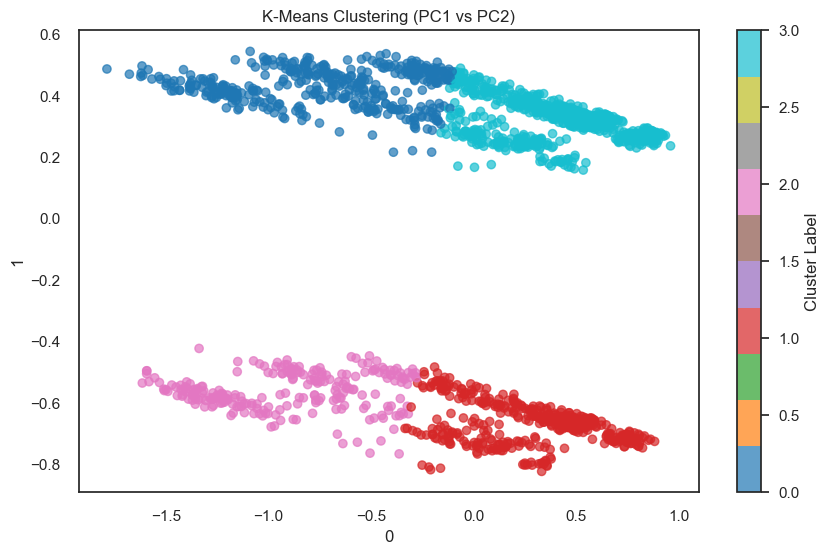

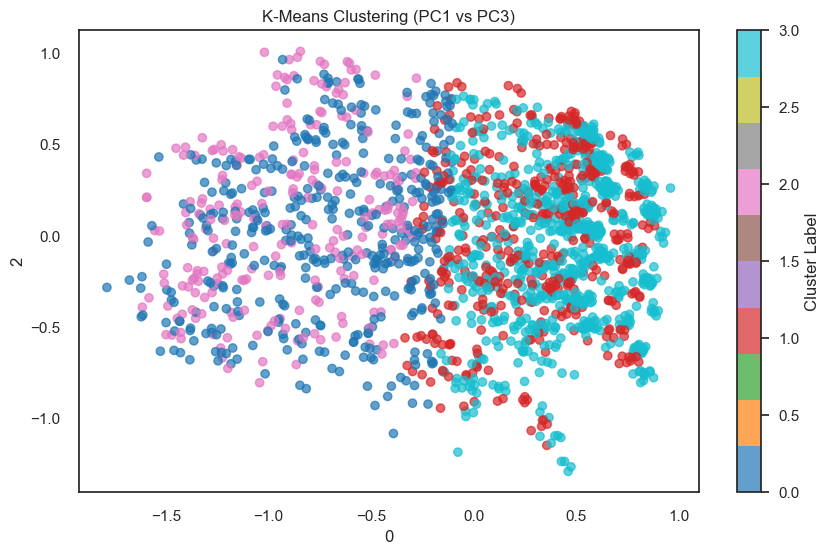

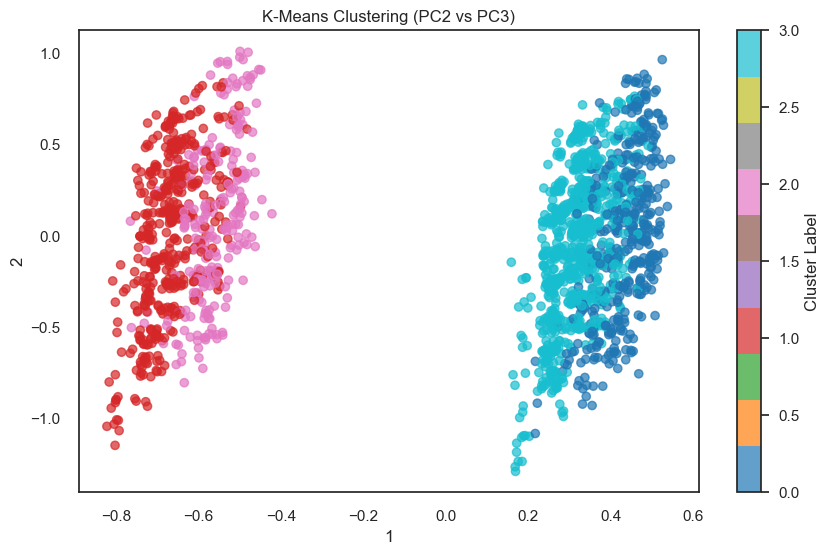

In [976]:
plot_pca_2d(df_pca, kmeans.labels_, 'K-Means Clustering (PC1 vs PC2)', 0, 1)
plot_pca_2d(df_pca, kmeans.labels_, 'K-Means Clustering (PC1 vs PC3)', 0, 2)
plot_pca_2d(df_pca, kmeans.labels_, 'K-Means Clustering (PC2 vs PC3)', 1, 2)


## Evaluation

As we can see, the best K-Means Clustering Silhouette Score is better than the best Agglomerative Clustering score.

We can even see this in the mapping of the clusters. The Cluster is in a rough spherical shape, which means that k-means will have a better performace in this data, compared to the Agglomerative cluster. This is what the Silhouette Score reflects as well.

So, going forward, we are only going to be working with K-Means Clustering

In [977]:
df_transformed.describe()

,Education,Marital_Status,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Z_CostContact,Z_Revenue,Customer_Tenure,Total_Spending,Income_Group,Age_Group,Has_Kids,Accepted_Offers,Hierarchical_Cluster,KMeans_Cluster
count,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,...,1981.0,1981.0,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000
mean,0.117617,0.640081,0.495566,0.199261,0.128606,0.094824,0.140567,0.101464,0.120192,0.157833,...,0.0,0.0,0.492933,0.233437,0.408632,0.524230,0.737506,0.273094,0.212014,1.752650
std,0.322236,0.480098,0.292844,0.223528,0.197175,0.131256,0.208022,0.156709,0.143529,0.130444,...,0.0,0.0,0.410347,0.237096,0.356726,0.389468,0.440101,0.445661,0.408838,1.211227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.242424,0.015405,0.005025,0.008696,0.007722,0.003802,0.024862,0.066667,...,0.0,0.0,0.000000,0.024603,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,0.494949,0.113195,0.035176,0.037101,0.046332,0.030418,0.066298,0.133333,...,0.0,0.0,0.500000,0.146032,0.500000,0.500000,1.000000,0.000000,0.000000,2.000000
75%,0.000000,1.000000,0.747475,0.329538,0.160804,0.125797,0.177606,0.121673,0.154696,0.200000,...,0.0,0.0,1.000000,0.403175,0.500000,1.000000,1.000000,1.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [978]:
df_transformed.head()

,Education,Marital_Status,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Z_CostContact,Z_Revenue,Customer_Tenure,Total_Spending,Income_Group,Age_Group,Has_Kids,Accepted_Offers,Hierarchical_Cluster,KMeans_Cluster
0,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.200000,...,0.0,0.0,0.0,0.639683,0.5,1.0,0.0,1.0,1,2
1,0.0,0.0,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.133333,...,0.0,0.0,1.0,0.008730,0.5,1.0,1.0,0.0,0,1
2,0.0,1.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.066667,...,0.0,0.0,0.5,0.305952,0.0,0.5,0.0,0.0,1,0
3,0.0,1.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.133333,...,0.0,0.0,1.0,0.019048,1.0,0.0,1.0,0.0,0,3
4,0.0,1.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.333333,...,0.0,0.0,1.0,0.165476,0.5,0.0,1.0,0.0,0,3


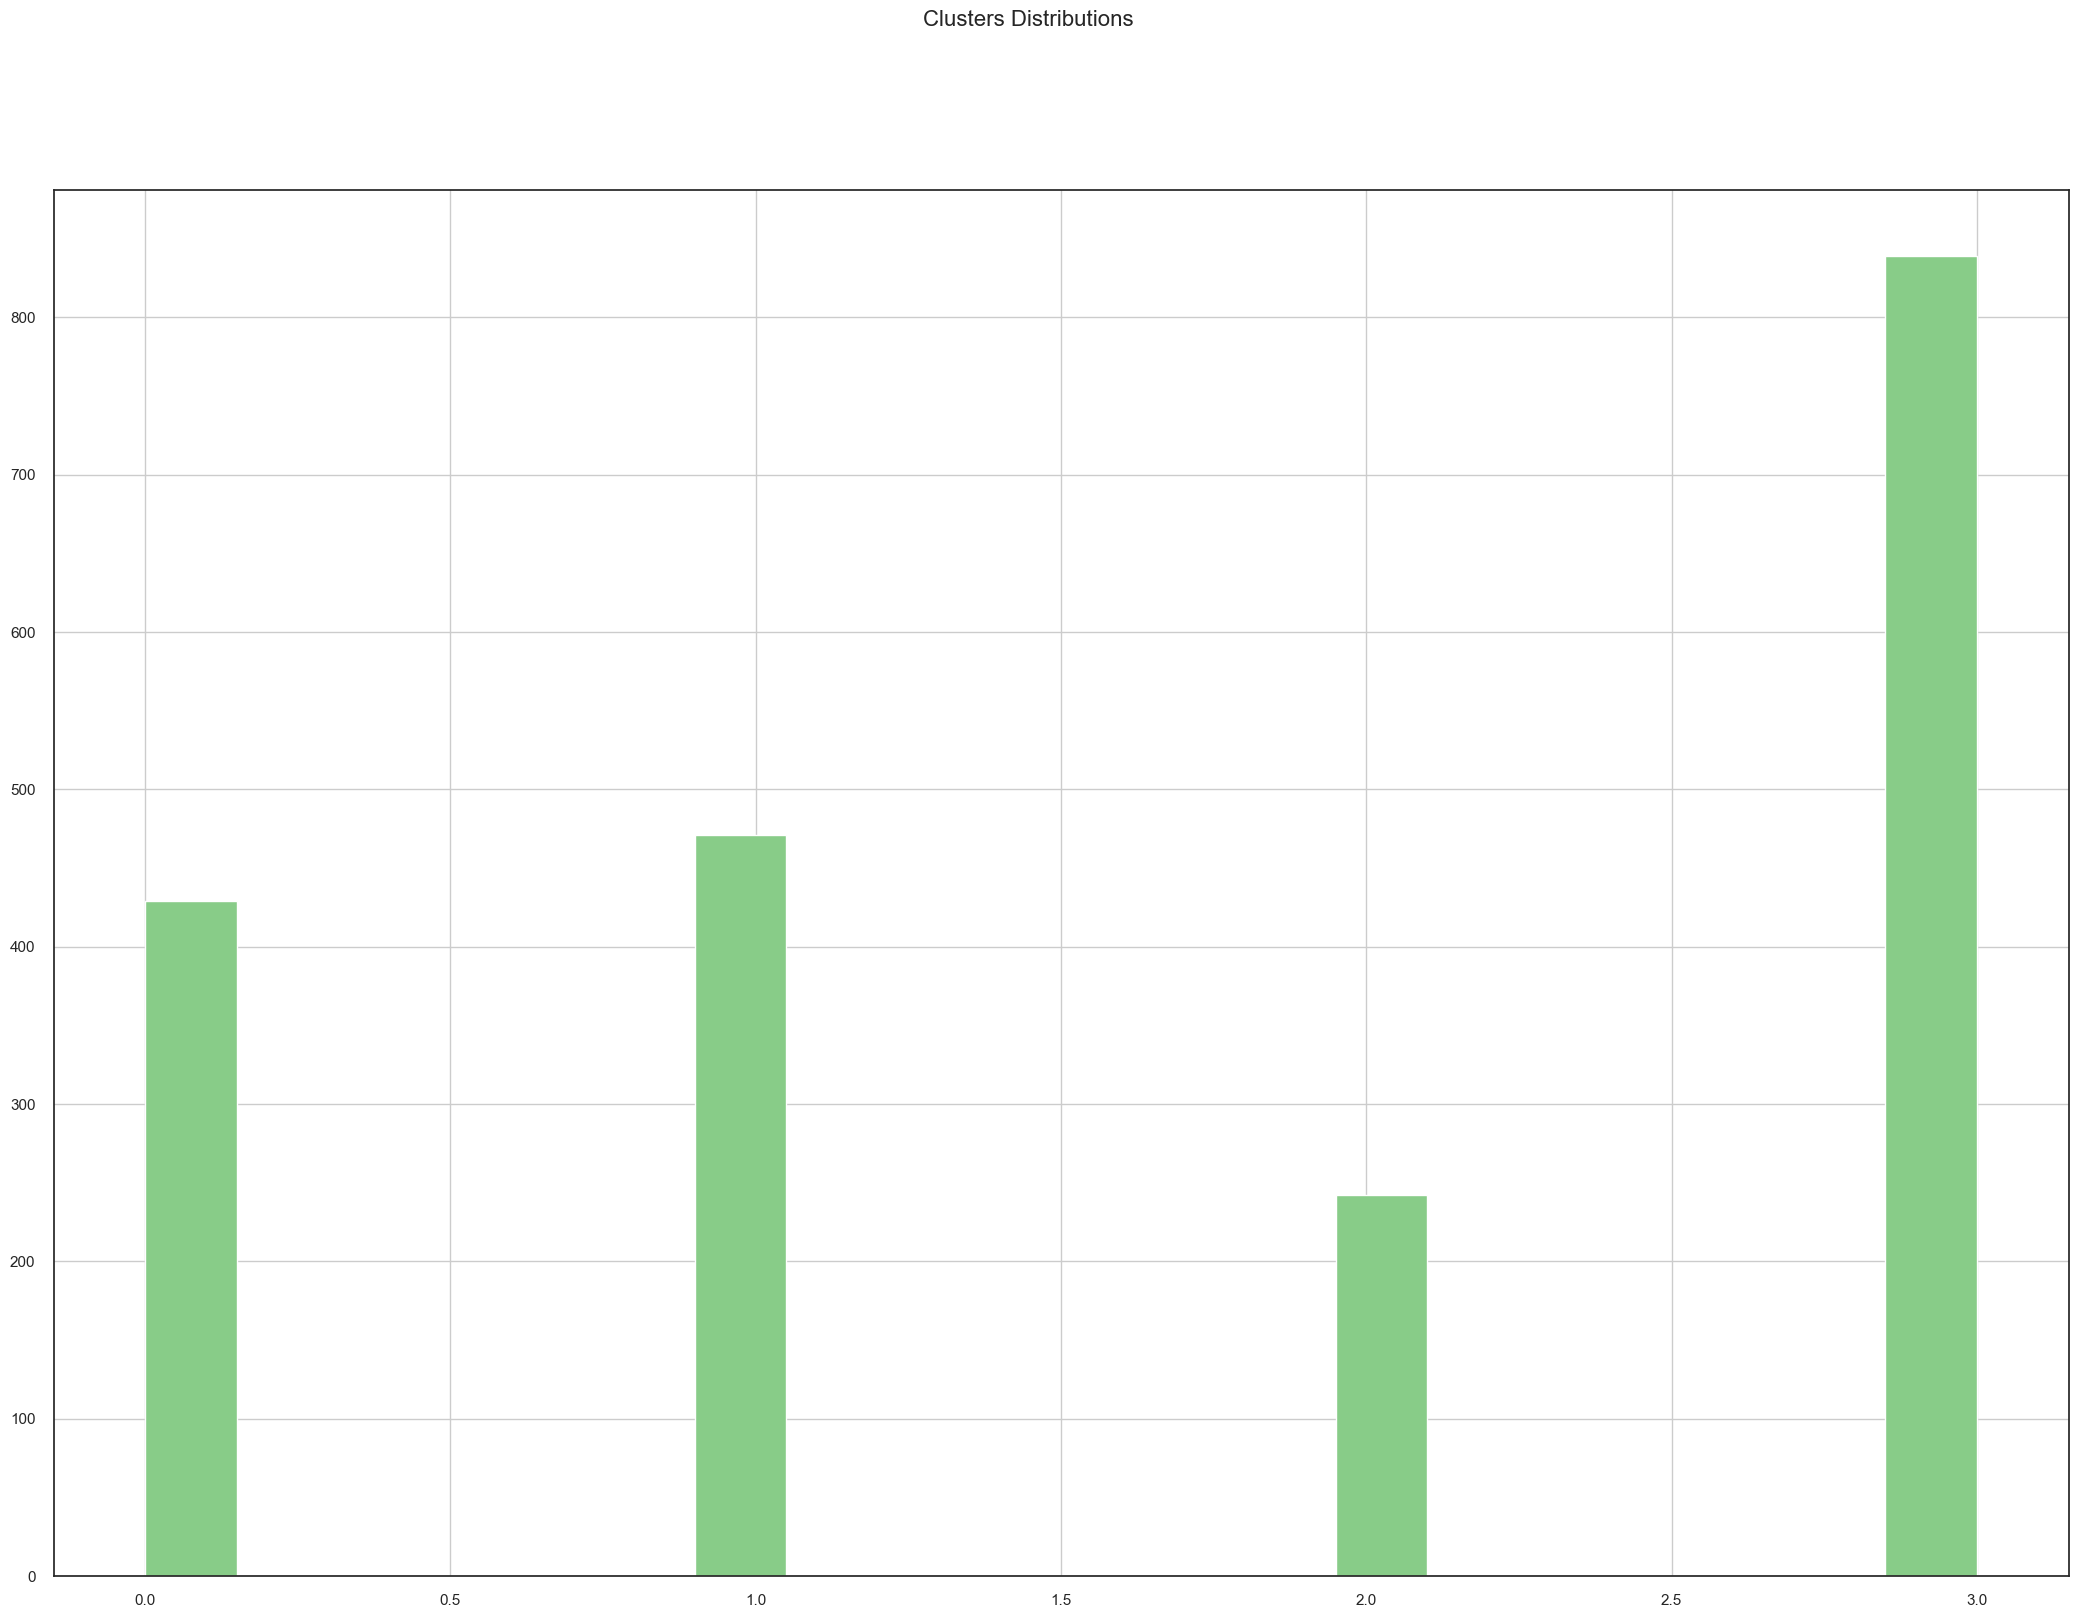

In [979]:
plot_distributions(df_transformed['KMeans_Cluster'], "Clusters Distributions")

In [980]:
def plot_spending(col):
    plt.figure(figsize=(10, 6))
    for cluster in df_transformed['KMeans_Cluster'].unique():
        sns.kdeplot(df_transformed[df_transformed['KMeans_Cluster'] == cluster][col], label=f'Cluster {cluster}', fill=True)

    plt.title(f"{col} Distribution Across Clusters")
    plt.xlabel(col)
    plt.legend()
    plt.show()

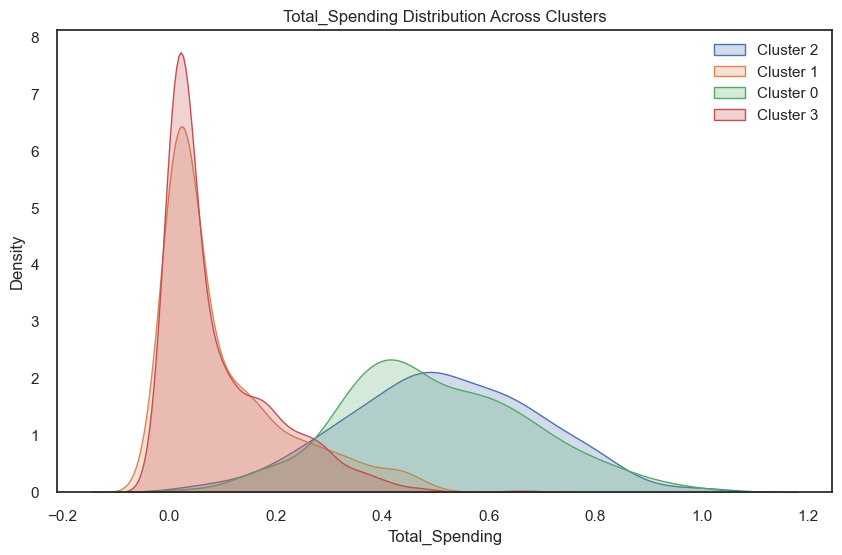

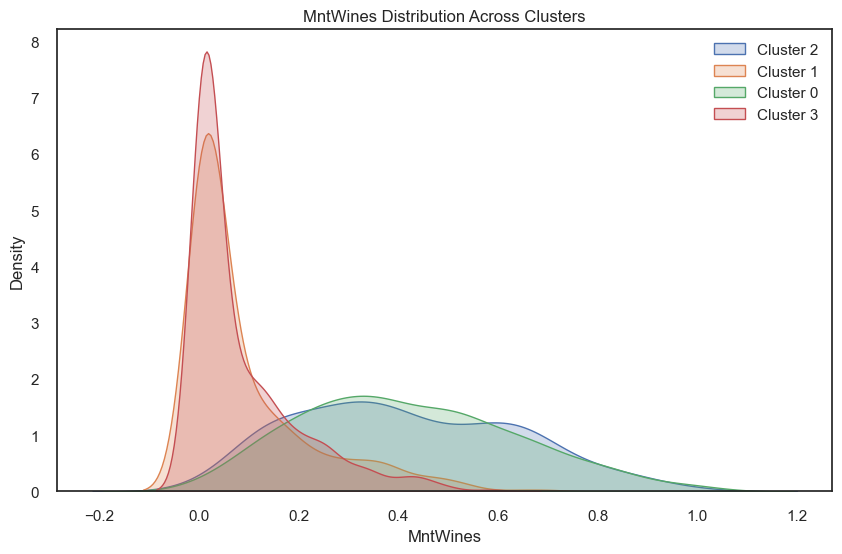

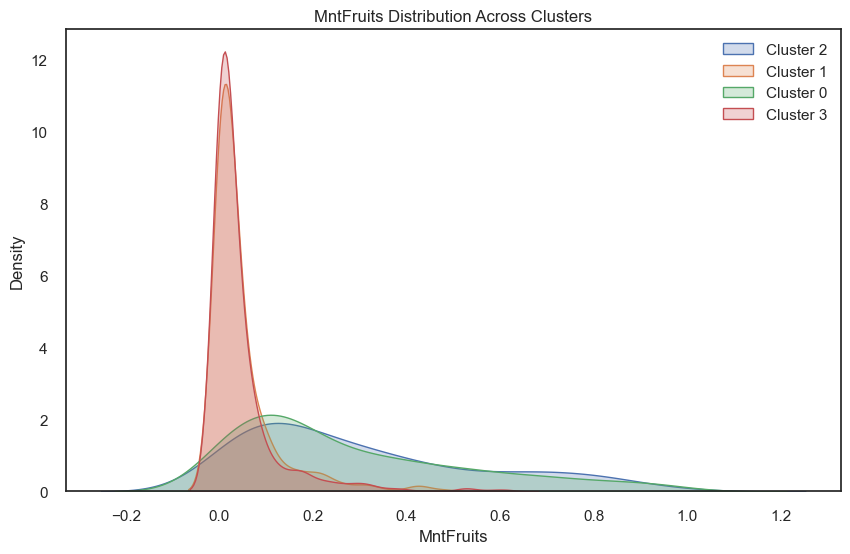

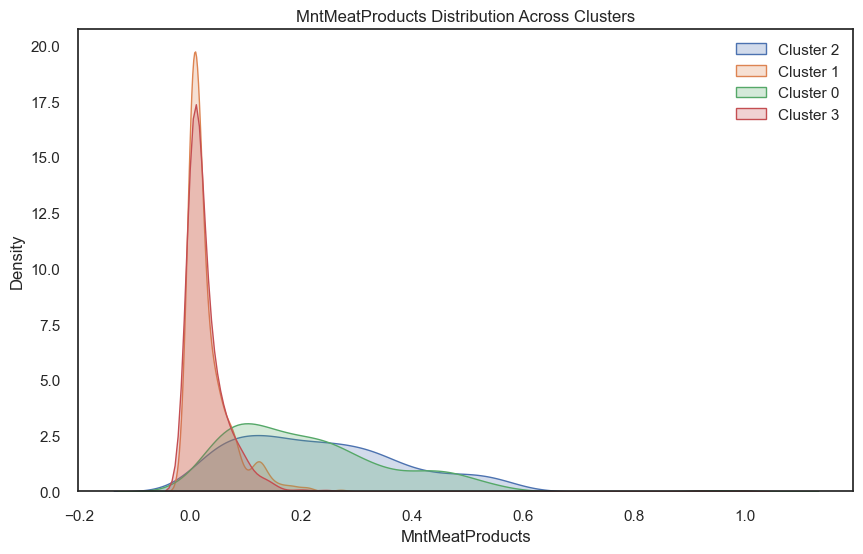

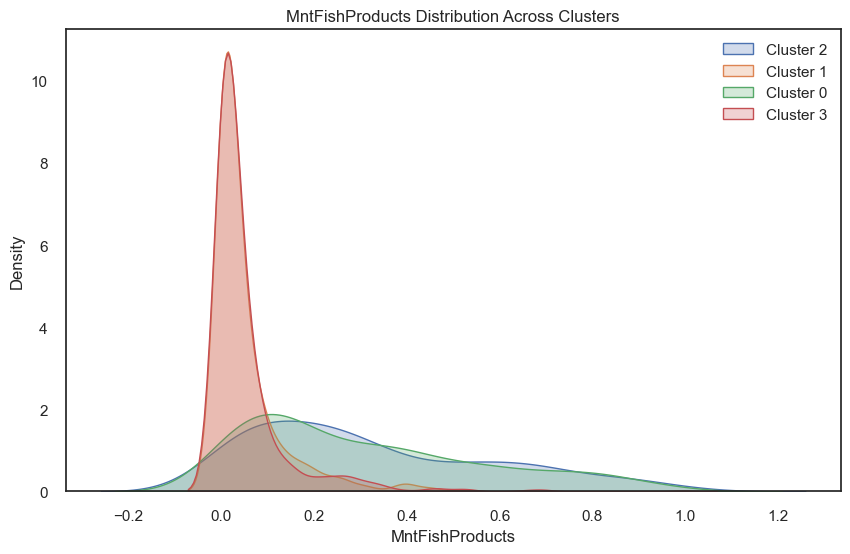

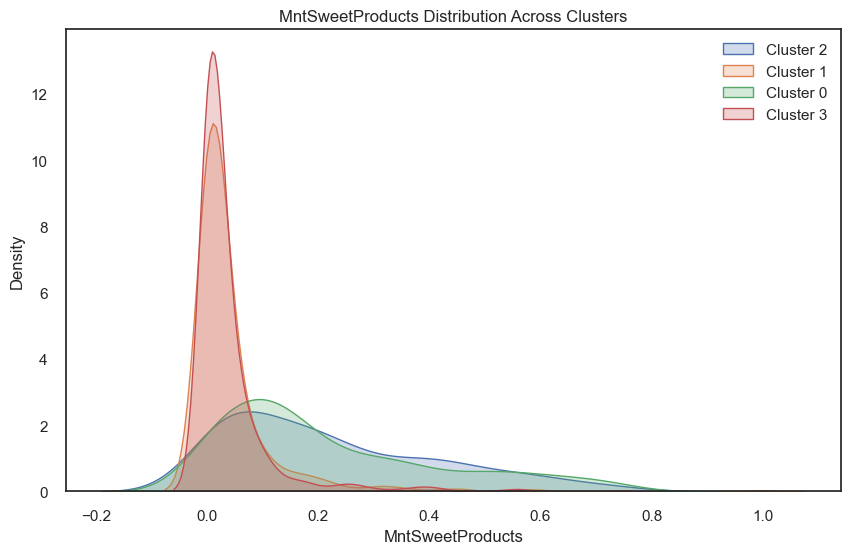

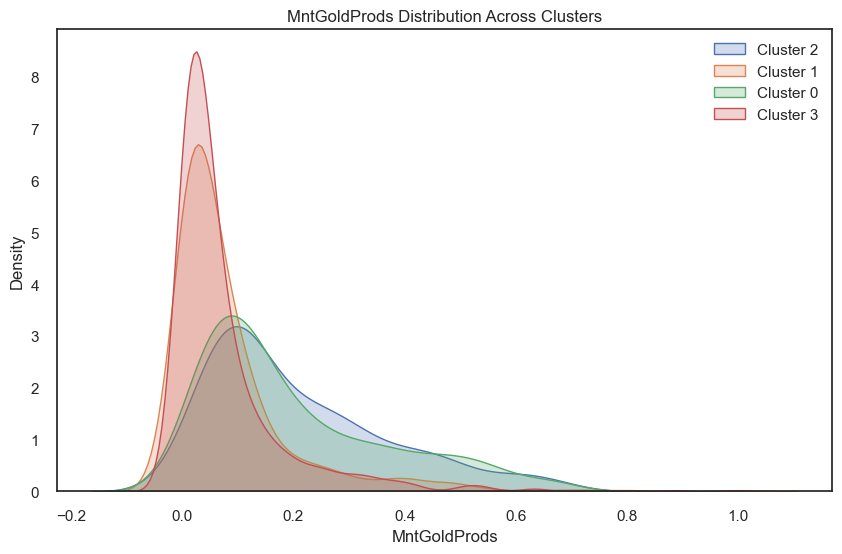

In [981]:
spending_categories = ['Total_Spending', 'MntWines', 'MntFruits',
                        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for c in spending_categories:
    plot_spending(c)

In [982]:
normalization_step = preprocessing_pipeline.named_steps ['normalization']
df_original_scale = normalization_step.inverse_transform(df_transformed.iloc[:, :-2])
df_original_scale = pd.concat([df_original_scale, df_transformed.iloc[:, -2:]], axis=1)
encoding_step = preprocessing_pipeline.named_steps['encode_categorical_values']
df_original_scale = encoding_step.inverse_transform(df_original_scale)
df_transformed = df_original_scale

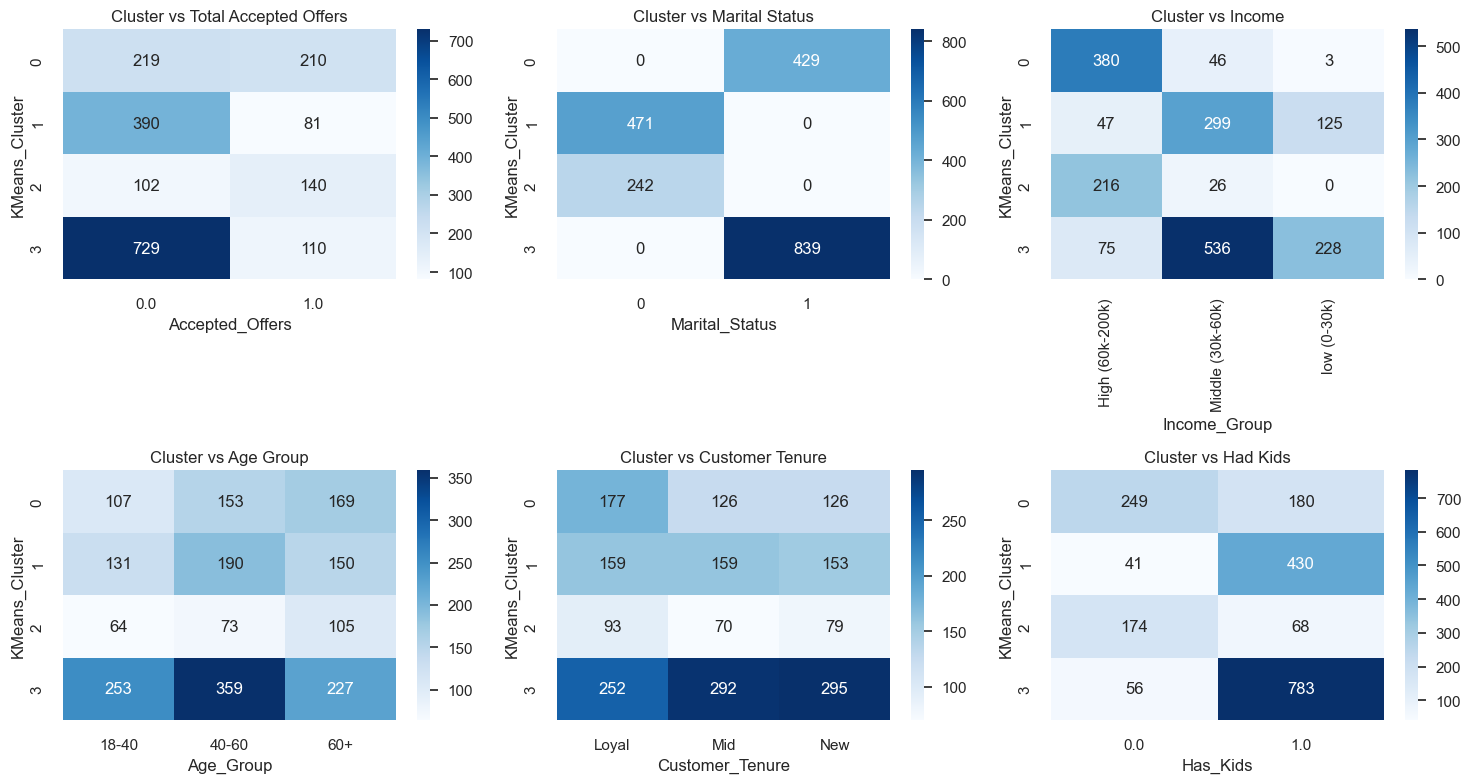

In [983]:
crosstabs = [
    pd.crosstab(df_transformed['KMeans_Cluster'], df_transformed['Accepted_Offers']),
    pd.crosstab(df_transformed['KMeans_Cluster'], df_transformed['Marital_Status']),
    pd.crosstab(df_transformed['KMeans_Cluster'], df_transformed['Income_Group']),
    pd.crosstab(df_transformed['KMeans_Cluster'], df_transformed['Age_Group']),
    pd.crosstab(df_transformed['KMeans_Cluster'], df_transformed['Customer_Tenure']),
    pd.crosstab(df_transformed['KMeans_Cluster'], df_transformed['Has_Kids' ])
]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
titles = ["Cluster vs Total Accepted Offers", "Cluster vs Marital Status", "Cluster vs Income",
        "Cluster vs Age Group", "Cluster vs Customer Tenure", "Cluster vs Had Kids"]
for i, crosstab in enumerate(crosstabs):
    sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", ax=axes[i])
    axes[i].set_title(titles[i])
plt.tight_layout()
plt.show()

### Summary Table

Clustetr | Total Accepted Offers | Marital Status | Income Group | Age Group | Customer Tenure | Has Kids | Spending Distribution
|------|------|------|------|------|------|------|------|
0 |Low (only customers 4.7% accepted) | Has Partner(100%) | Middle Income (73%) | Majority 40-60 years (64%) | Evenly distributed | 97% Has Kids | Low Spending
1 |High (99.5% customers accepted) | Single (62%) | High Income (97%) | 40+ years (86%) | Evenly distributed | 87% No Kids | High Spending
2 |Low (9.5%% customers accepted) | Single (100%) | Low to Middle Income (86%) | 40-60 (54%) | Evenly distributed | 89% Has Kids | low Spending |
3| Low (11% customers accepted) | Has Partner (100%) | High Income(84%) | 40+(92%) | Evenly distributed | Evenly distributed | Medium Spending
4 |High (99.5% customers accepted) | Has Partner (68%) | Middle Income (67%) | Majority 40-60 years (60%) | Loyal (70%) | 91% Has Kids | High Spending







### Insights

#### Cluster 0: Low Acceptance, Low Spending

This group is likely budget-conscious, prioritizing essential spending over discretionary purchases. Their low acceptance of offers suggests they may not find the offers relevant or valuable.

##### Recommendations:

Since they are moshy Middle Income families, we can tailor offers to their financial constraints (e.g, discounts, budget-friendly bundles). Focus on family-oriented products or services, since 97% of them have kids

#### Cluster 1: High Acceptance, High Spending

This group has disposable income and is willing to spend. Their high acceptance rate suggests they are always on the look out for new offers, and do not hesitate to capitalise of those offers.

##### Recommendations:

Focus on premium or high-margin products/services, to get the biggest bang for the buck. Offer exclusive or personalized deals to build loyalty. They spend quite a bit on wine, and can be potential spender for Gold related products

#### Cluster 2: Low Acceptance, Low Spending

This group is financially constrained with most of them in the low to middle income set up. They seem likely to prioritize just the necessities. Their low acceptance rate might suggest that they do not have the money to spend on the items being marketed.

##### Recommendations:

Offer value-driven promotions (e.g., buy-one-get-one, loyalty discounts). These are people who dont have too much loyalty to a specific brand, as they buy whatever has the best value. Focus on family-friendly products or services, as most of them have kids

#### Cluster 3: Low Acceptance, Medium Spending

This group is financially well-off, but not too responsive to offers. This category of customers are evenly split in whether or not they have kids in their houses, and most of them are 40+. We can focus on fish, fruits and wine related products, as they seem to spend a decent amount of
money there.

##### Recommendations:

Offer exclusive or early-access deals to maintain and build loyalty. Use personalized marketing to enhance their customer experience.

#### Cluster 4: High Acceptance, High Spending

This group is middle income, loyal, and highly responsive to offers. Their high spending and acceptance rates make them a key target for premium offerings.

##### Recommendations:

Focus on upselling and cross-selling high-margin products/services. Offer exclusive or early-access deals to maintain loyalty, and milk the cash cow Use personalized marketing to enhance their customer experience.

# Conclusion

This was a fun project, where I learnt a lot about various Clustering models, as well as customer beheviour, which I always found to be fascinating.

In this project we used 2 Clustering Methods, K-Means and Agglomerative Clustering. We used various HyperParameters to tune the 2 models to find out the best parameters. We then compared both the models using their respective best params. And we used Silhouette Scores to
compare the 2.

For this particular dataset, we found out that K-Means clustering was better than Agglomerative Clustering.

For the K-Means Clustering we the Elbow method to find the optimal number of clusters, and we trained the model, after performing various preprocessing steps, including normalizing it.

In the end, we were able to categorize our customers into 5 categories, and gain insights into each of those categories. This helps us make sure that we are marketing the right products at the right price to the right customers.

### Improvements

One potential thing we could have done to improve, or done differently with our model, is to have tried creating our own a custom Non-Euclidean distance metric for the K-Means Clustering, like Cosine. This may have helped us better categorize our customers. This is a mystery because, our custom distance metric might make our model better or it might be worse the one we used. But it still would be a fun and interesting thing to try out, as there is no harm in trying something new.